In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.preprocessing
data2018 = pd.read_csv("./ks-projects-201801.csv")

In [2]:
data2018['launched'] = pd.to_datetime(data2018['launched'])
data2018['deadline'] = pd.to_datetime(data2018['deadline'])
data2018['duration'] = (data2018['deadline'] - data2018['launched']).dt.days


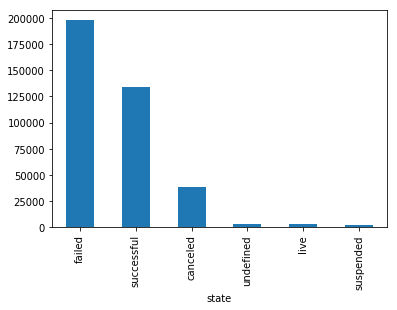

In [3]:
data2018.groupby("state").size().sort_values(ascending=False).plot.bar()
plt.show()

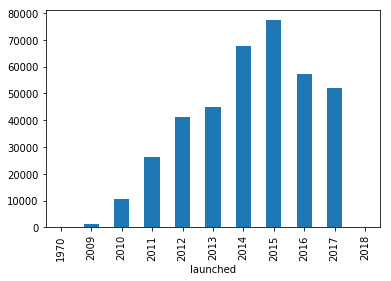

In [4]:
data2018.groupby(data2018['launched'].map(lambda x: x.year)).size().plot.bar()
plt.show()

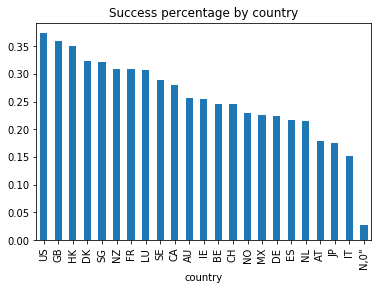

In [5]:
all_projects = data2018.groupby("country").size().sort_values(ascending=False).to_frame()
success = data2018.loc[data2018['state'] == 'successful'].groupby("country").size().sort_values(ascending=False).to_frame()
tmp=pd.concat([all_projects,success],axis=1, join="inner")
tmp.columns = ["all","success"]
tmp['percentage'] = tmp['success'] / tmp['all']
tmp['percentage'].sort_values(ascending=False).plot.bar()
plt.title("Success percentage by country")
plt.show()

In [6]:
data2018.drop(['ID','name','usd pledged'], axis=1, inplace=True)

data2018 = data2018[data2018.state != 'live']
data2018 = data2018[data2018.state != 'undefined']
data2018 = data2018[data2018.state != 'suspended']
data2018 = data2018[data2018.state != 'canceled']
data2018['state'] = (data2018['state'] == 'successful').astype(int)


le = sk.preprocessing.LabelEncoder()

for i in ['category','main_category','currency','country']:
    data2018[i] = le.fit_transform(data2018[i])

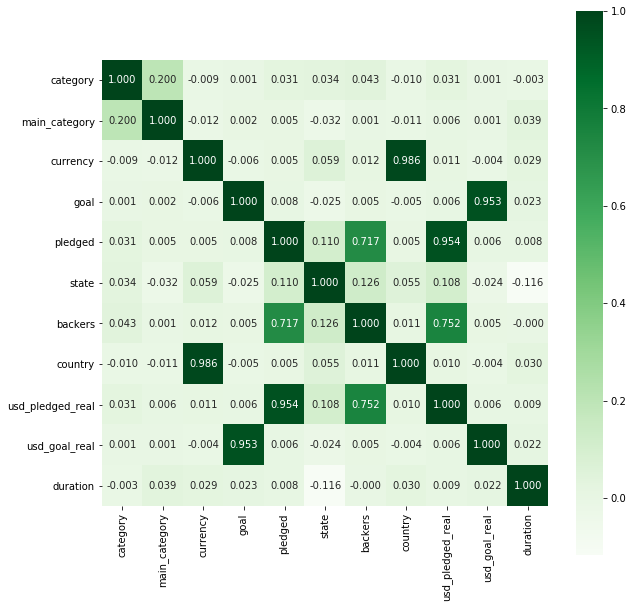

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data2018.corr(),annot=True,fmt=".3f",cmap='Greens',square=True)
plt.show()

In [8]:
data2018

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,duration
0,108,12,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,0,0,9,0.00,1533.95,58
1,93,6,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,22,2421.00,30000.00,59
2,93,6,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,0,3,22,220.00,45000.00,44
3,90,10,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,22,1.00,5000.00,29
5,123,7,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,22,52375.00,50000.00,34
6,58,7,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,22,1205.00,1000.00,19
7,41,7,13,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,0,40,22,453.00,25000.00,44
10,95,12,1,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,0,0,3,0.00,2406.39,29
11,72,10,13,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,1,100,22,12700.00,12500.00,29
12,32,2,13,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,0,0,22,0.00,5000.00,29
